# Classification with Neural Network using Numpy only <br>

Author: jvachier <br>
Creation date: June 2022 <br>
Publication date: July 2022 <br>

My goal is to classify $10$ digits from $0$ to $9$ with Neural Networks using Numpy only. The training set (train.csv) contains $42 000$ labelled pictures and the testing set (test.csv) contains $28 000$ non-labelled pictures. Each picture has $789$ pixels ($28 \times 28$) and is the input size of the network. <br>

Three Networks are built: <br> 
* 1 - Two Layers Neural Network with Sigmoid (2 Layers with Sigmoid 1), using a sigmoid activation function for the output layer. After the input, the first layer is composed of $20$ neurons. The second layer (the output layer) contains $10$ neurons as $10$ digits are classified. <br><br>
* 2 - Two Layers Neural Network with Softmax (2 Layers with Softmax), however here we use a softmax as activation function for the output layer. <br><br>
* 3 - Three layers Neural Network with Softmax (3 Layers with Softmax). The first layer contains $128$ neurons, the second layer $20$ neurons and the output layer $10$ neurons.

In the three Networks, the activation function for the intermediate layers is ReLu and the accuracy is computed. Moreover, the cost function used is the mean squared error (MSE). In the case of the first Neural Network, two backward propagations are used to show that it is not necessary to include the activation function of the output layer in the computations (appendix - 2 Layers with Sigmoid 2). In addition, to see the effect of the learning rate in the third Neural Network, two values are used and the accuracy is compared (appendix). <br>

The three Networks are first trained independently on the training set and then tested using the test set. The accuracy reaches almost $99\%$.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from PIL import Image as im
from IPython.display import display 
from matplotlib.pyplot import imshow 

2022-07-02 15:24:52.751959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 15:24:52.751978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Functions

In [2]:
## Activation Functions ##
## ReLu ##
def Relu(x):
    return np.maximum(0,x)
    
def Relu_derive(x):
    return np.where(x <= 0, 0, 1)
    
## Sigmoid ##
def Sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
    
def Sigmoid_deriv(x):
    return Sigmoid(x)*(1.0 - Sigmoid(x))

## Softmax ##
def Softmax(x):
    return np.exp(x)/sum(np.exp(x))

## Cost function ##
def cost(y_data,y_prediction):
    return np.sum((y_data - y_prediction)**2/y_data.size)

def Categrorical_accuracy(output_layer,data): 
    maxarg = lambda x : np.argmax(x)
    yTrue = np.array([maxarg(z) for z in data.T])
    yPred = np.array([maxarg(z) for z in output_layer.T])
    CategoricalAccuracy = sum(yPred == yTrue)/len(yPred)
    return CategoricalAccuracy

## Different Neural Networks 

### 2 Layers with Sigmoid 1

In [3]:
def Layers2_sigmoid(n_xtrain,y_train,iterations, learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 20
    n_neurons_layer2 = 10 # 10 digits
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    
    accuracy_history_Network1 = []
    sqrt_mse_history_Network1 = []
    r2_score_history_Network1 = []
    Cost_history_Network1     = []
    
    for j in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Sigmoid(Z_layer2)
   
        
        
        ## backward propagation ##
        MSE      = activation_layer2 - y_train 
        Layer_1b = (weights_layer2.T @ MSE) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T
        
        # Layer 2 #
        biases_layer2  = biases_layer2 - learning_rate*MSE
        weights_layer2 = weights_layer2 - learning_rate*(MSE @ activation_layer1.T)  
        # Layer 1 #
        weights_layer1 = weights_layer1 - learning_rate * Layer_1w
        biases_layer1  = biases_layer1 - learning_rate * Layer_1b
 
        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer2,y_train)

        accuracy_history_Network1.append(categoricalAccuracy)
        sqrt_mse_history_Network1.append(np.sqrt(mean_squared_error(y_train,activation_layer2)))
        r2_score_history_Network1.append(r2_score(y_train,activation_layer2))
        Cost_history_Network1.append(cost(y_train,activation_layer2))


        if j%500 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer2.T)
            print("Epoch", j)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer2)))
            print("R2 Score: ",r2_score(y_train,activation_layer2))
            print("Cost: ", cost(y_train,activation_layer2))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
        
    return Cost_history_Network1, accuracy_history_Network1, sqrt_mse_history_Network1, r2_score_history_Network1, weights_layer1, biases_layer1, weights_layer2, biases_layer2

#### Validation Network 1

In [4]:
def Layers2_sigmoid_Validation(x_train_np,m_ytrain,weights_layer1, biases_layer1, weights_layer2, biases_layer2):
    for i in range(10):
        a          = np.random.randint(0,m_xtrain)
        array_test = np.reshape(x_train_np[:,a]*255.0, (28, 28))
        data_test  = im.fromarray(array_test)
        imshow(data_test)
        Z_layer1          = weights_layer1 @ x_train_np[:,a,None] + biases_layer1
        activation_layer1 = Relu(Z_layer1)

        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Sigmoid(Z_layer2)
        print("The number is: ", np.argmax(activation_layer2,0)[a])

        plt.show()

### 2 Layers with Softmax 

In [5]:
def Layers2_softmax(n_xtrain,y_train,iterations, learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 20
    n_neurons_layer2 = 10 # 10 numbers
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    
    
    accuracy_history_Network2 = []
    sqrt_mse_history_Network2 = []
    r2_score_history_Network2 = []
    Cost_history_Network2     = []
    
    for j in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Softmax(Z_layer2)
        
        ## backward propagation ##
        MSE      = activation_layer2 - y_train 
        Layer_1b = (weights_layer2.T @ MSE) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T
        
        # Layer 2 #
        biases_layer2  = biases_layer2 - learning_rate*MSE
        weights_layer2 = weights_layer2 - learning_rate*(MSE @ activation_layer1.T)  
        # Layer 1 #
        weights_layer1 = weights_layer1 - learning_rate * Layer_1w
        biases_layer1  = biases_layer1 - learning_rate * Layer_1b

 
        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer2,y_train)

        accuracy_history_Network2.append(categoricalAccuracy)
        sqrt_mse_history_Network2.append(np.sqrt(mean_squared_error(y_train,activation_layer2)))
        r2_score_history_Network2.append(r2_score(y_train,activation_layer2))
        Cost_history_Network2.append(cost(y_train,activation_layer2))


        if j%500 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer2.T)
            print("Epoch", j)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer2)))
            print("R2 Score: ",r2_score(y_train,activation_layer2))
            print("Cost: ", cost(y_train,activation_layer2))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
        
    return Cost_history_Network2, accuracy_history_Network2, sqrt_mse_history_Network2, r2_score_history_Network2, weights_layer1, biases_layer1, weights_layer2, biases_layer2

#### Validation Network 2

In [6]:
def Layers2_softmax_Validation(x_train_np,m_ytrain,weights_layer1, biases_layer1, weights_layer2, biases_layer2):
    for i in range(10):
        a          = np.random.randint(0,m_xtrain)
        array_test = np.reshape(x_train_np[:,a]*255.0, (28, 28))
        data_test  = im.fromarray(array_test)
        imshow(data_test)
        Z_layer1          = weights_layer1 @ x_train_np[:,a,None] + biases_layer1
        activation_layer1 = Relu(Z_layer1)

        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Softmax(Z_layer2)
        print("The number is: ", np.argmax(activation_layer2,0)[a])

        plt.show()

### 3 Layers with Softmax 

In [7]:
def Layers3_softmax(n_xtrain,y_train,iterations, learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 128
    n_neurons_layer2 = 20
    n_neurons_layer3 = 10 # 10 numbers
    
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    # Layer 3 #
    weights_layer3 = np.random.rand(n_neurons_layer3,n_neurons_layer2)- 0.5  #matrix
    biases_layer3  = np.random.rand(n_neurons_layer3,1) - 0.5  #vector
    
    
    
    accuracy_history_Network3 = []
    sqrt_mse_history_Network3 = []
    r2_score_history_Network3 = []
    Cost_history_Network3     = []
    
    for j in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Relu(Z_layer2)
        Z_layer3          = weights_layer3 @ activation_layer2 + biases_layer3
        activation_layer3 = Softmax(Z_layer3)
        
        
        
       
        ## backward propagation ##
        MSE      = activation_layer3 - y_train 
        Layer_2b = (weights_layer3.T @ MSE) * Relu_derive(Z_layer2) 
        Layer_2w = Layer_2b @ activation_layer1.T
        Layer_1b = (weights_layer2.T  @ Layer_2b) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T 
        
        # Layer 3 #
        biases_layer3  = biases_layer3 - learning_rate*MSE
        weights_layer3 = weights_layer3 - learning_rate*(MSE @ activation_layer2.T)  
        # Layer 2 #
        weights_layer2 = weights_layer2 - learning_rate * Layer_2w
        biases_layer2  = biases_layer2 - learning_rate * Layer_2b
        # Layer 1 #
        weights_layer1 = weights_layer1 - learning_rate * Layer_1w
        biases_layer1  = biases_layer1 - learning_rate * Layer_1b
   

        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer3,y_train)

        accuracy_history_Network3.append(categoricalAccuracy)
        sqrt_mse_history_Network3.append(np.sqrt(mean_squared_error(y_train,activation_layer3)))
        r2_score_history_Network3.append(r2_score(y_train,activation_layer3))
        Cost_history_Network3.append(cost(y_train,activation_layer3))


        if j%500 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer3.T)
            print("Epoch", j)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer3)))
            print("R2 Score: ",r2_score(y_train,activation_layer3))
            print("Cost: ", cost(y_train,activation_layer3))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
            
    return Cost_history_Network3, accuracy_history_Network3, sqrt_mse_history_Network3, r2_score_history_Network3, weights_layer1, biases_layer1, weights_layer2, biases_layer2, weights_layer3, biases_layer3

#### Validation Network 3

In [8]:
def Layers3_softmax_Validation(x_train_np,m_ytrain,weights_layer1, biases_layer1, weights_layer2, biases_layer2, weights_layer3, biases_layer3):
    for i in range(10):
        a          = np.random.randint(0,m_ytrain)
        array_test = np.reshape(x_train_np[:,a]*255.0, (28, 28))
        data_test  = im.fromarray(array_test)
        imshow(data_test)
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)

        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Relu(Z_layer2)

        Z_layer3          = weights_layer3 @ activation_layer2 + biases_layer3
        activation_layer3 = Softmax(Z_layer3)
        print("The number is: ", np.argmax(activation_layer3,0)[a])
        plt.show()

## Data importation

In [9]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [10]:
df_train.head() #there are labels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test.head() # there are no labels here

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train = df_train.T
df_test  = df_test.T

## Training 

In [13]:
label      = df_train.iloc[0,:] #get the label
x_train    = df_train.iloc[1:,:]/255 #normalization
x_train_np = x_train.to_numpy()
y_train = label.to_numpy()
y_train = to_categorical(y_train, num_classes=10)
y_train = y_train.T
print(x_train_np.shape,y_train.shape)

(784, 42000) (10, 42000)


In [14]:
n_xtrain, m_xtrain = x_train_np.shape
n_ytrain, m_ytrain = y_train.shape

### Neural Network 1: 2 Layers with Sigmoid function 

In [15]:
Cost_history_Network1, accuracy_history_Network1, sqrt_mse_history_Network1, r2_score_history_Network1, weights_layer1_Network1, biases_layer1_Network1, weights_layer2_Network1, biases_layer2_Network1 = Layers2_sigmoid(n_xtrain,y_train,2001,1E-5)

2022-07-02 15:25:00.019133: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-02 15:25:00.019159: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jeremy-Precision-3551): /proc/driver/nvidia/version does not exist
2022-07-02 15:25:00.019601: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 0
Root Mean Squared Error:  0.6536691481047417
R2 Score:  -3.747593103617673
Cost:  0.4272833551839787
Categorical Accuracy:  0.1234047619047619  (Keras:  0.12340476 )


Epoch 500
Root Mean Squared Error:  0.12330752124028287
R2 Score:  0.8310583816278387
Cost:  0.015204744794422805
Categorical Accuracy:  0.9125  (Keras:  0.9125 )


Epoch 1000
Root Mean Squared Error:  0.10927753862776386
R2 Score:  0.8673157652972824
Cost:  0.011941580448542426
Categorical Accuracy:  0.9317857142857143  (Keras:  0.9317857 )


Epoch 1500
Root Mean Squared Error:  0.10185518037845881
R2 Score:  0.8847280182656794
Cost:  0.010374477769928381
Categorical Accuracy:  0.9414285714285714  (Keras:  0.94142854 )


Epoch 2000
Root Mean Squared Error:  0.09646769987015168
R2 Score:  0.8965998039552237
Cost:  0.00930601711823766
Categorical Accuracy:  0.948047619047619  (Keras:  0.94804764 )




#### Validation Network 1

The number is:  3


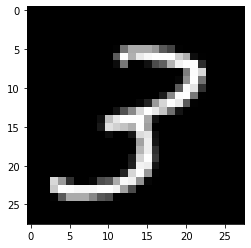

The number is:  1


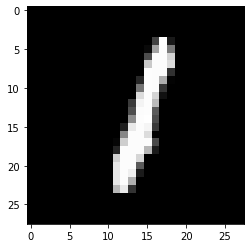

The number is:  0


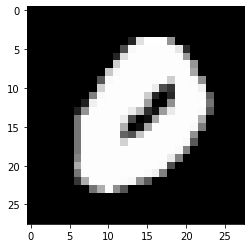

The number is:  2


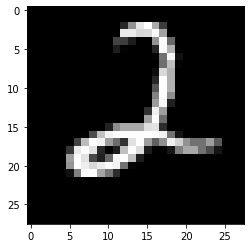

The number is:  5


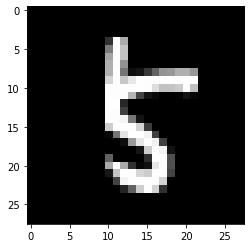

The number is:  2


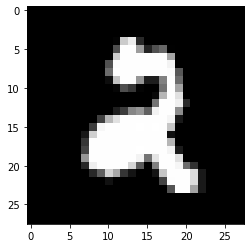

The number is:  7


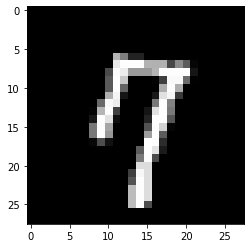

The number is:  7


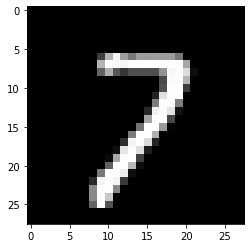

The number is:  8


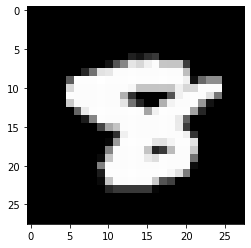

The number is:  5


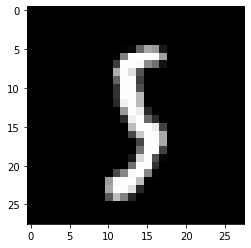

In [16]:
Layers2_sigmoid_Validation(x_train_np,m_ytrain,weights_layer1_Network1, biases_layer1_Network1, weights_layer2_Network1, biases_layer2_Network1)

### Neural Network 2: 2 Layers with Softmax function 

In [17]:
Cost_history_Network2, accuracy_history_Network2, sqrt_mse_history_Network2, r2_score_history_Network2, weights_layer1_Network2, biases_layer1_Network2, weights_layer2_Network2, biases_layer2_Network2 = Layers2_softmax(n_xtrain,y_train,2001,1E-5)

Epoch 0
Root Mean Squared Error:  0.3585359301148403
R2 Score:  -0.42831133829230167
Cost:  0.12854801318331366
Categorical Accuracy:  0.07654761904761904  (Keras:  0.07654762 )


Epoch 500
Root Mean Squared Error:  0.1139065093928311
R2 Score:  0.8558367376096404
Cost:  0.012974692882059123
Categorical Accuracy:  0.9132619047619047  (Keras:  0.9132619 )


Epoch 1000
Root Mean Squared Error:  0.09849968826480378
R2 Score:  0.8921978984840054
Cost:  0.009702188588263522
Categorical Accuracy:  0.936952380952381  (Keras:  0.93695235 )


Epoch 1500
Root Mean Squared Error:  0.08995891580325768
R2 Score:  0.9100821445585355
Cost:  0.0080926065324976
Categorical Accuracy:  0.9464285714285714  (Keras:  0.9464286 )


Epoch 2000
Root Mean Squared Error:  0.0843085541323816
R2 Score:  0.9210229699834157
Cost:  0.007107932299892716
Categorical Accuracy:  0.9528809523809524  (Keras:  0.952881 )




#### Validation Network 2

The number is:  5


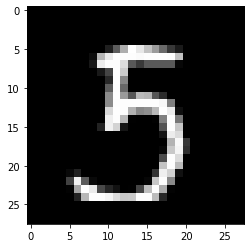

The number is:  9


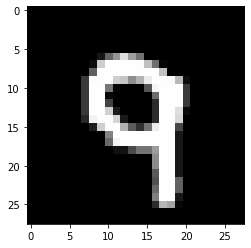

The number is:  1


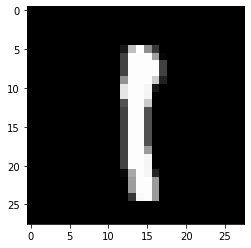

The number is:  1


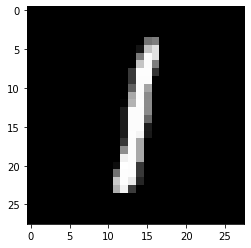

The number is:  8


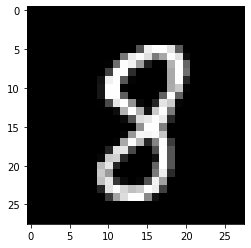

The number is:  3


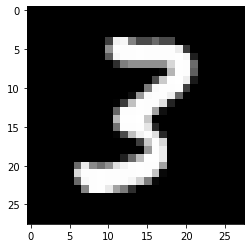

The number is:  4


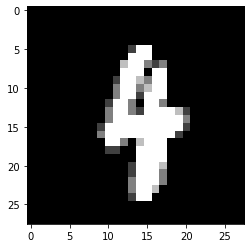

The number is:  3


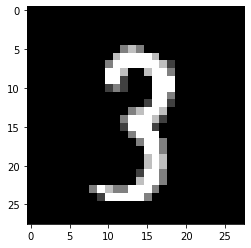

The number is:  6


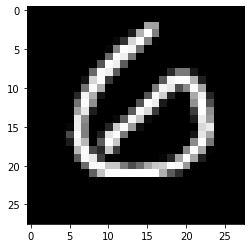

The number is:  4


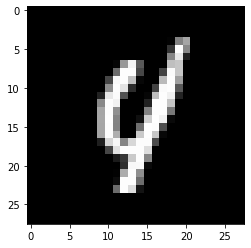

In [18]:
Layers2_softmax_Validation(x_train_np,m_ytrain,weights_layer1_Network2, biases_layer1_Network2, weights_layer2_Network2, biases_layer2_Network2)

### Neural Network 3: 3 Layers with Sigmoid function 

In [39]:
Cost_history_Network3, accuracy_history_Network3, sqrt_mse_history_Network3, r2_score_history_Network3, weights_layer1_Network3, biases_layer1_Network3, weights_layer2_Network3, biases_layer2_Network3, weights_layer3_Network3, biases_layer3_Network3 = Layers3_softmax(n_xtrain,y_train,2001,1E-5) 

Epoch 0
Root Mean Squared Error:  0.4078452647193885
R2 Score:  -0.8481974372461256
Cost:  0.16633775995402805
Categorical Accuracy:  0.06223809523809524  (Keras:  0.062238093 )


Epoch 500
Root Mean Squared Error:  0.09565485651728603
R2 Score:  0.8983349767520956
Cost:  0.009149851575342576
Categorical Accuracy:  0.9391428571428572  (Keras:  0.9391429 )


Epoch 1000
Root Mean Squared Error:  0.0741648262384732
R2 Score:  0.9388842026471327
Cost:  0.005500421450982926
Categorical Accuracy:  0.9647857142857142  (Keras:  0.9647857 )


Epoch 1500
Root Mean Squared Error:  0.06122384611626258
R2 Score:  0.9583515606105445
Cost:  0.003748359333267801
Categorical Accuracy:  0.9767857142857143  (Keras:  0.9767857 )


Epoch 2000
Root Mean Squared Error:  0.05084153525605519
R2 Score:  0.9712793127417999
Cost:  0.0025848617071927028
Categorical Accuracy:  0.9849761904761904  (Keras:  0.9849762 )




#### Validation Network 3

The number is:  7


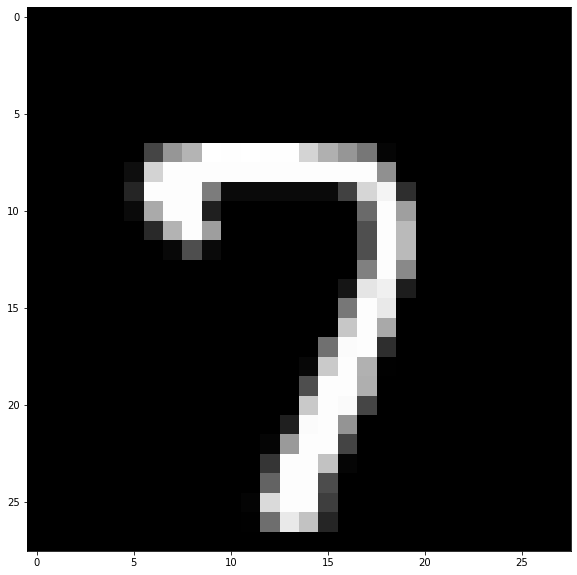

The number is:  8


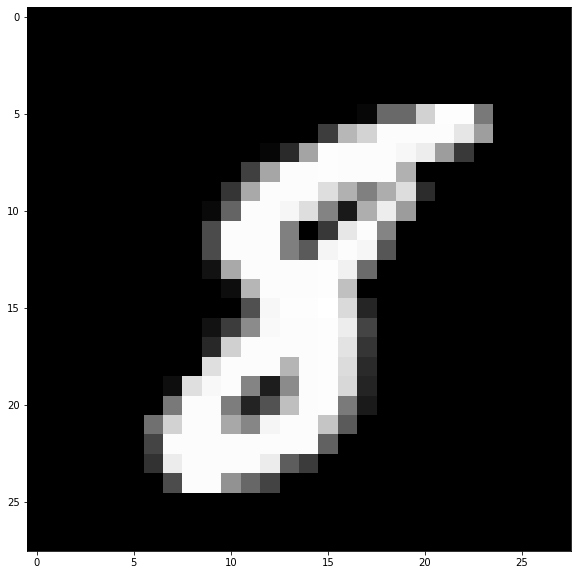

The number is:  0


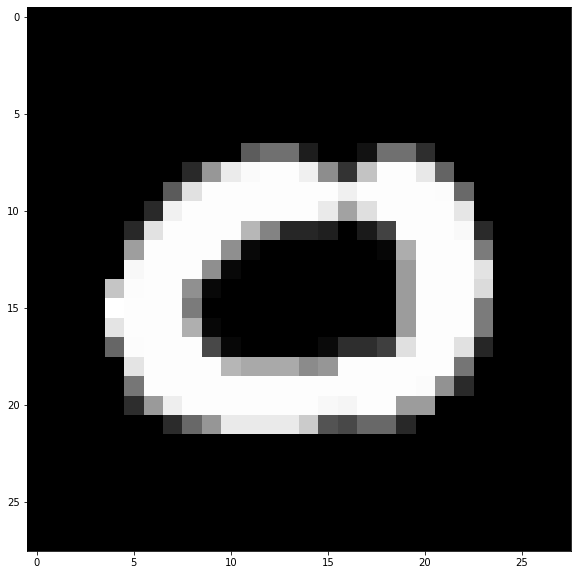

The number is:  3


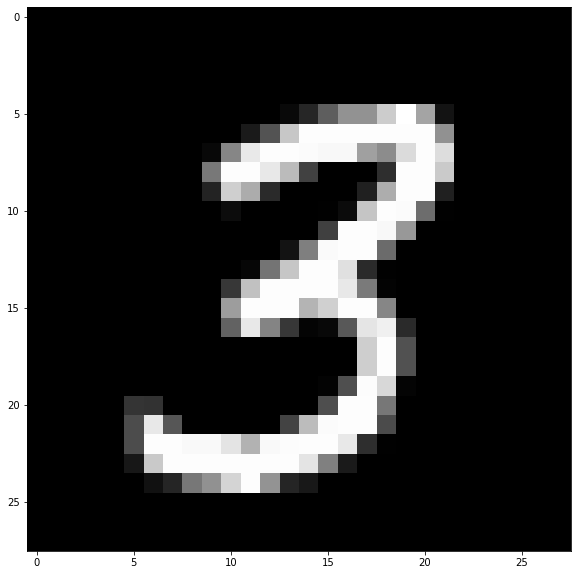

The number is:  9


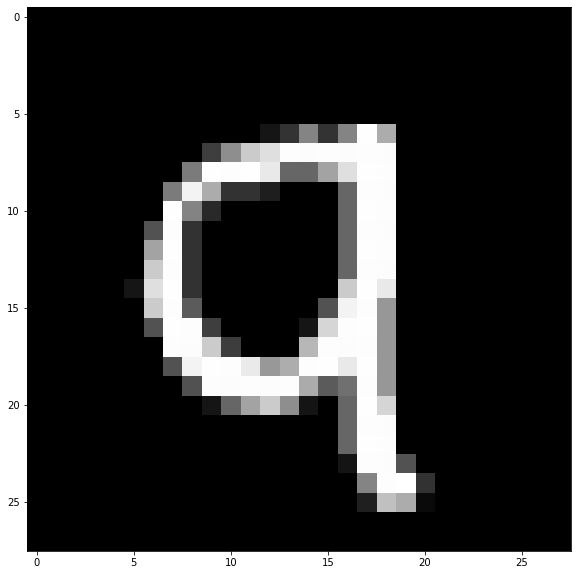

The number is:  9


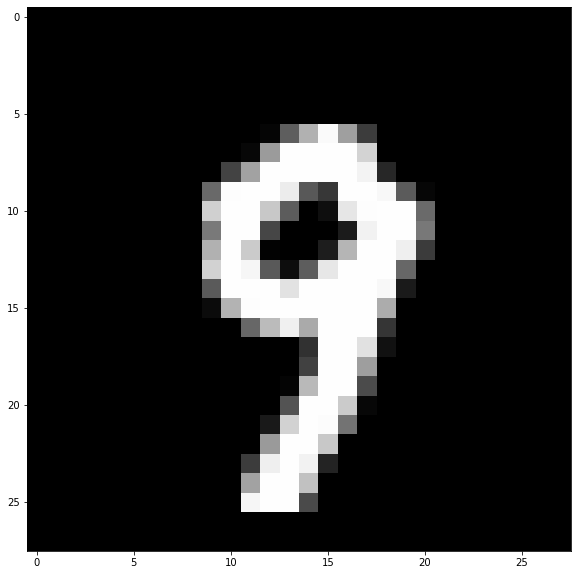

The number is:  0


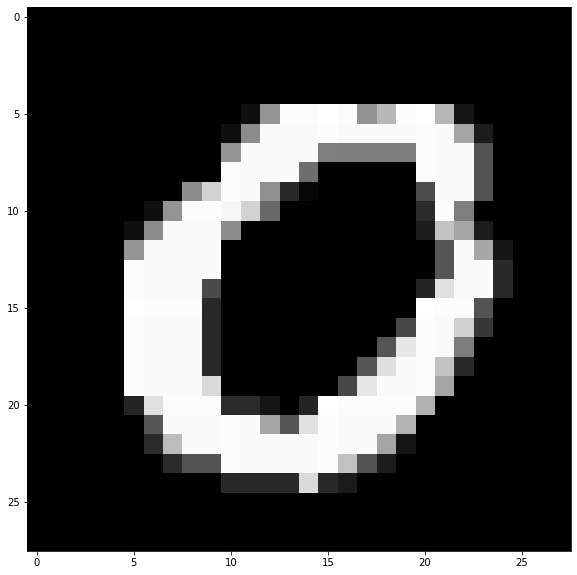

The number is:  1


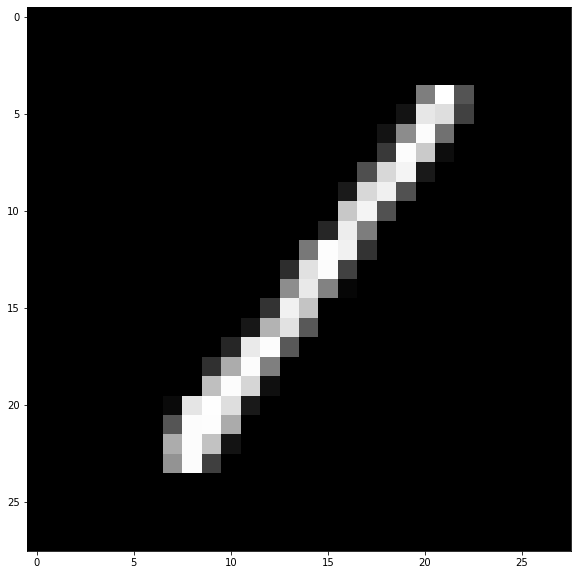

The number is:  1


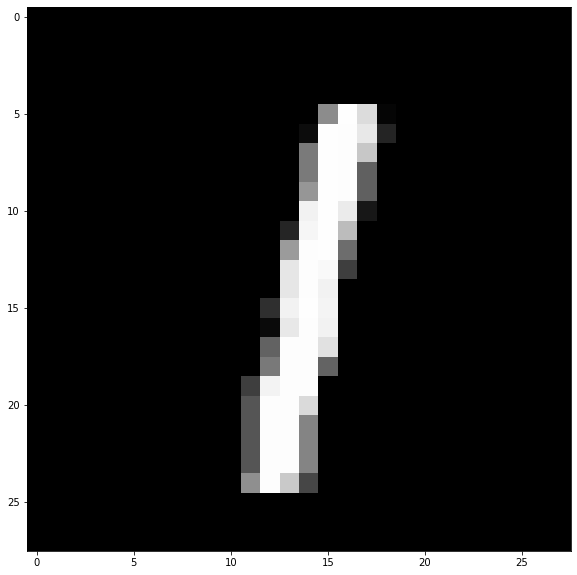

The number is:  0


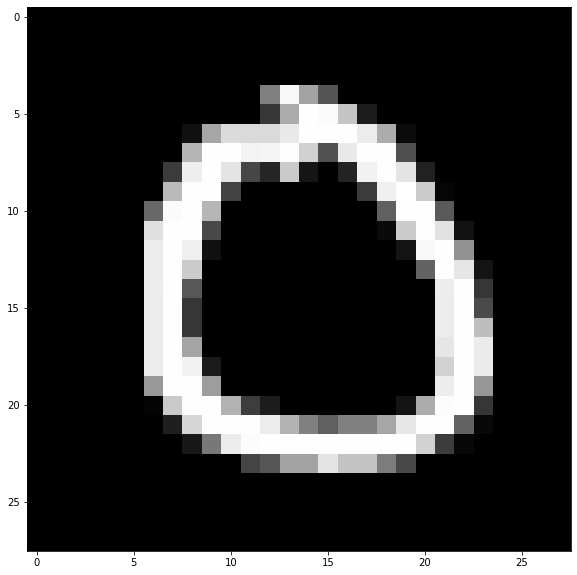

In [40]:
Layers3_softmax_Validation(x_train_np,m_ytrain,weights_layer1_Network3, biases_layer1_Network3, weights_layer2_Network3, biases_layer2_Network3, weights_layer3_Network3, biases_layer3_Network3)

### Ploting Results

In [21]:
plt.rcParams["figure.figsize"] = (15,10)

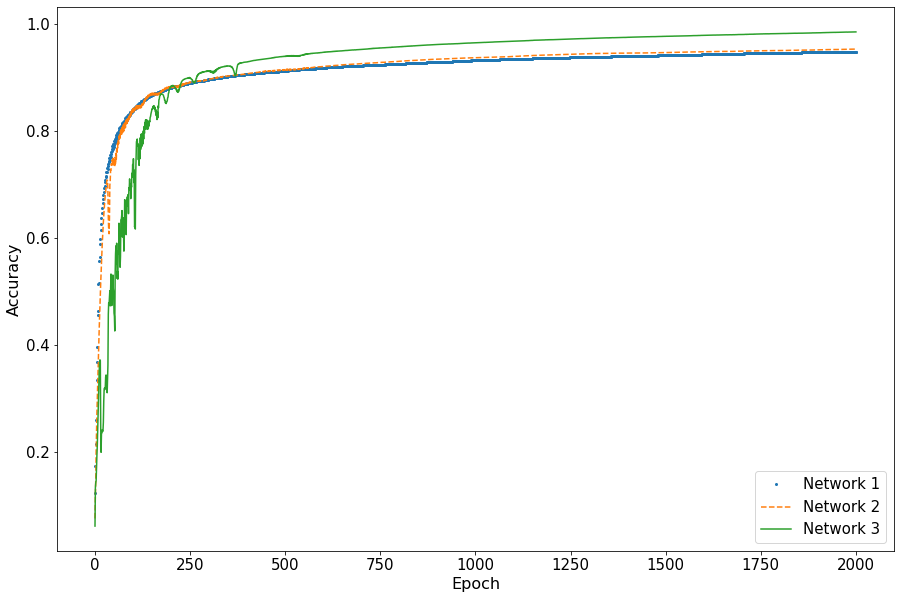

In [41]:
plt.plot(accuracy_history_Network1,'.',markersize=4, label="Network 1")
plt.plot(accuracy_history_Network2,'--', label="Network 2")
plt.plot(accuracy_history_Network3, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

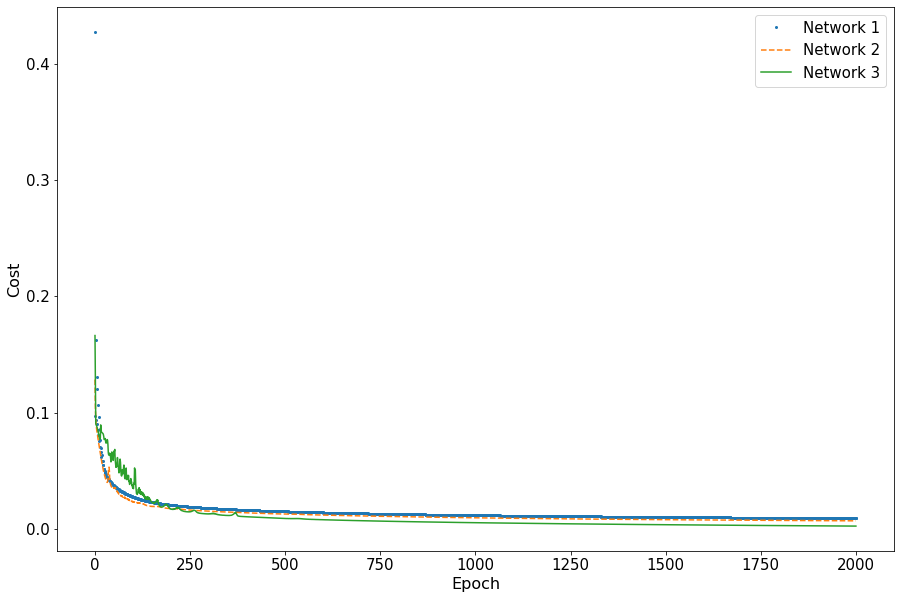

In [42]:
plt.plot(Cost_history_Network1,'.',markersize=4, label="Network 1")
plt.plot(Cost_history_Network2,'--', label="Network 2")
plt.plot(Cost_history_Network3, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Cost",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

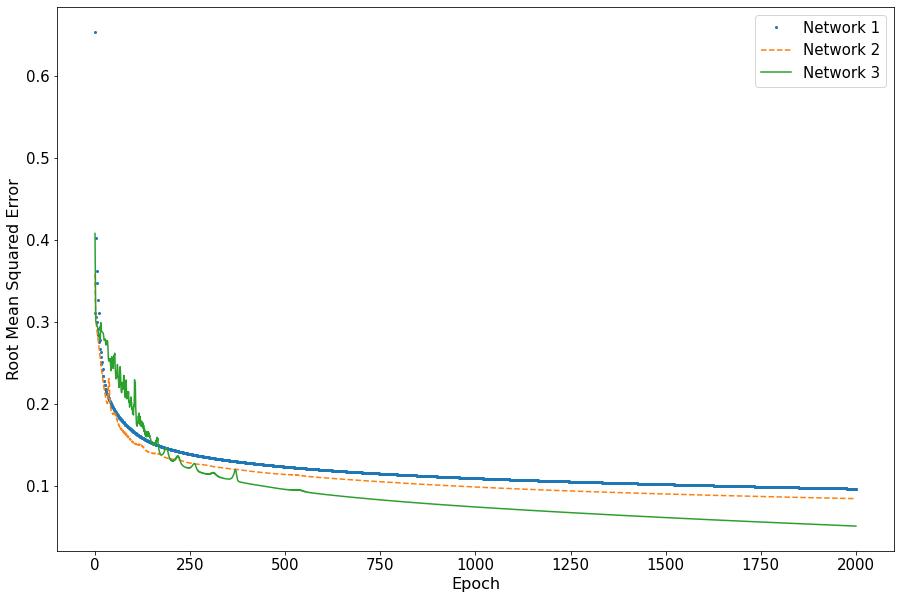

In [43]:
plt.plot(sqrt_mse_history_Network1,'.',markersize=4, label="Network 1")
plt.plot(sqrt_mse_history_Network2,'--', label="Network 2")
plt.plot(sqrt_mse_history_Network3, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Root Mean Squared Error",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

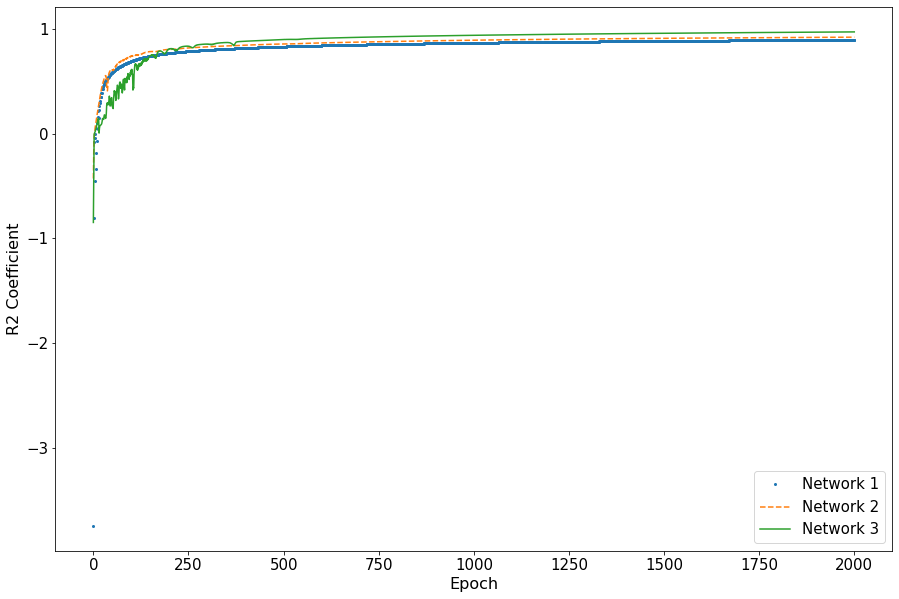

In [44]:
plt.plot(r2_score_history_Network1,'.',markersize=4, label="Network 1")
plt.plot(r2_score_history_Network2,'--', label="Network 2")
plt.plot(r2_score_history_Network3, label="Network 3")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("R2 Coefficient",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

## Testing 

In [26]:
x_test         = df_test/255.
x_test_np      = x_test.to_numpy()
n_test, m_test = x_test_np.shape
print(n_test,m_test)

784 28000


### Network 1

The number is:  [3]


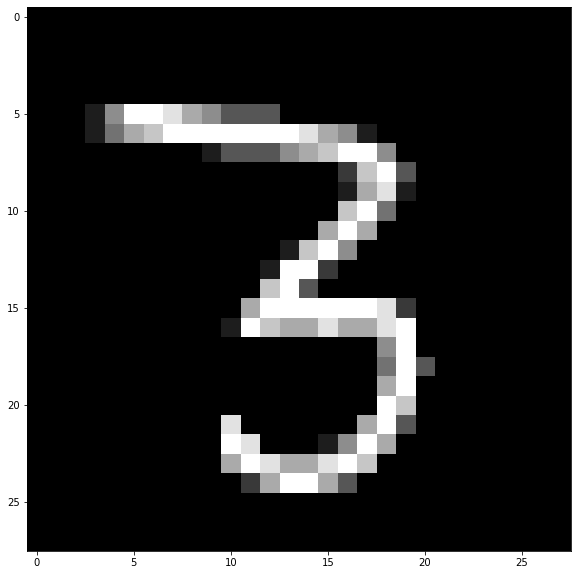

The number is:  [5]


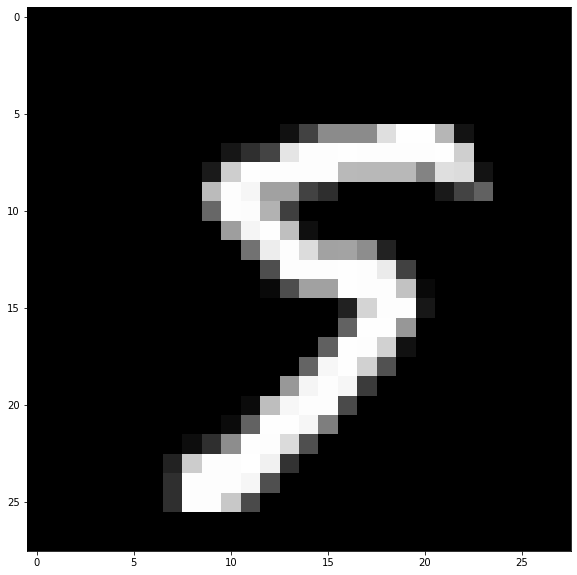

The number is:  [9]


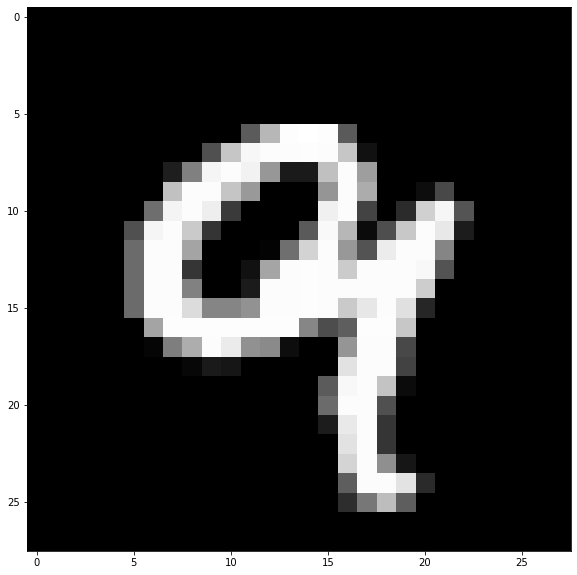

The number is:  [4]


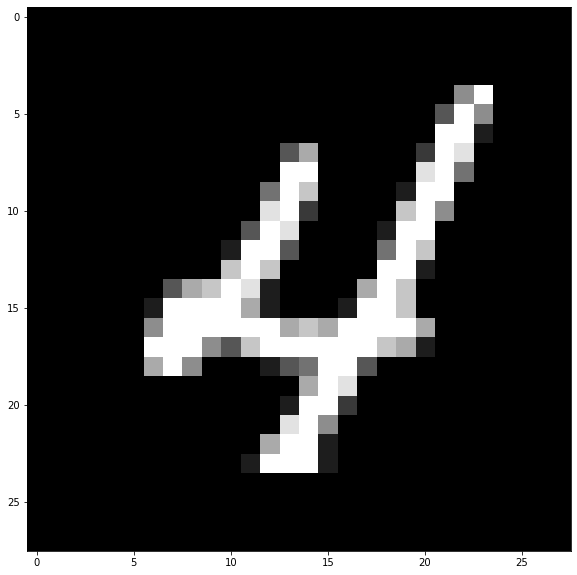

The number is:  [5]


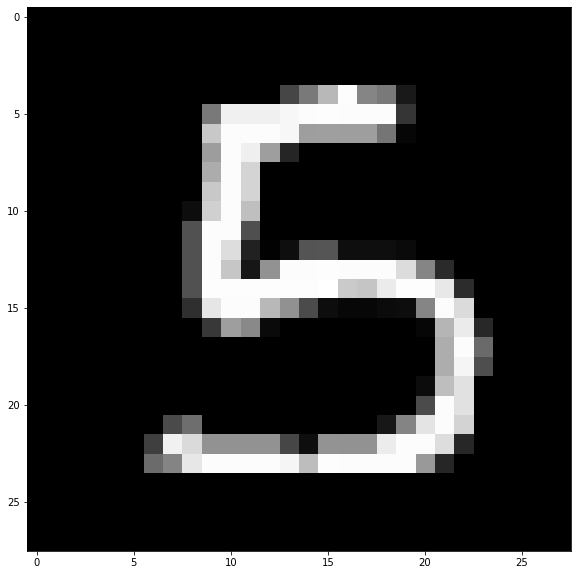

The number is:  [8]


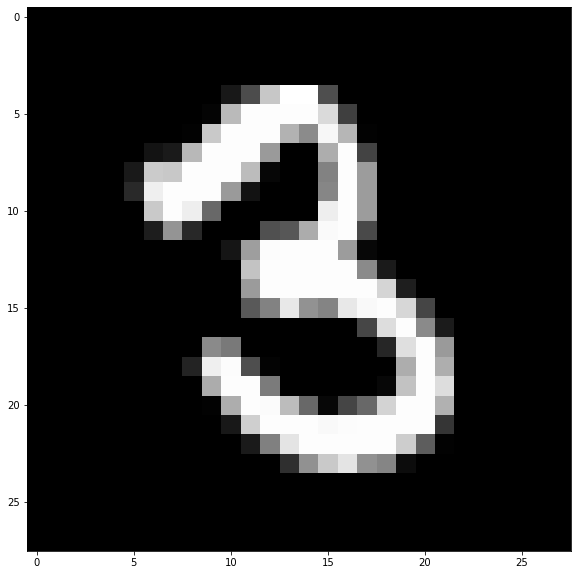

The number is:  [8]


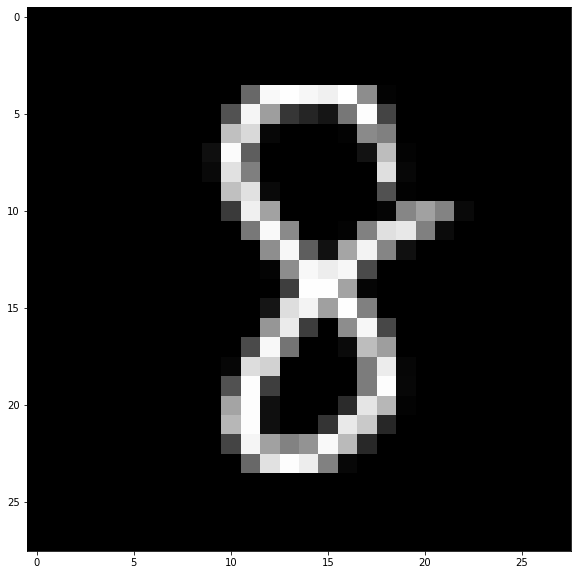

The number is:  [2]


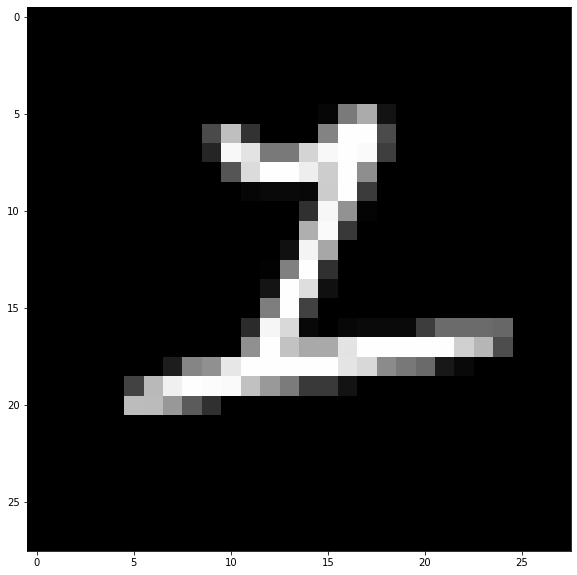

The number is:  [0]


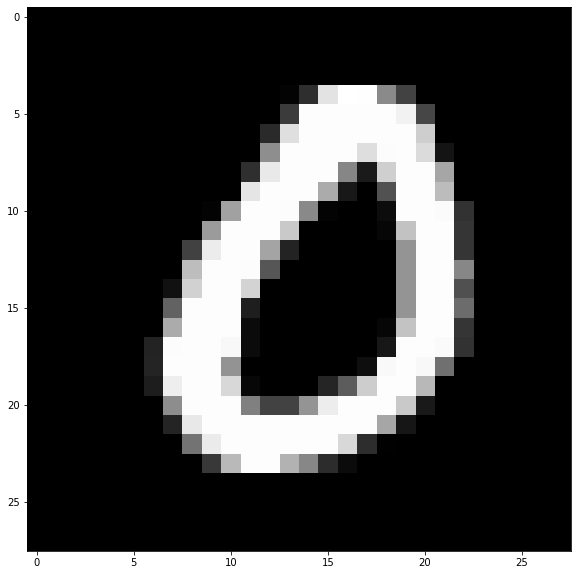

The number is:  [7]


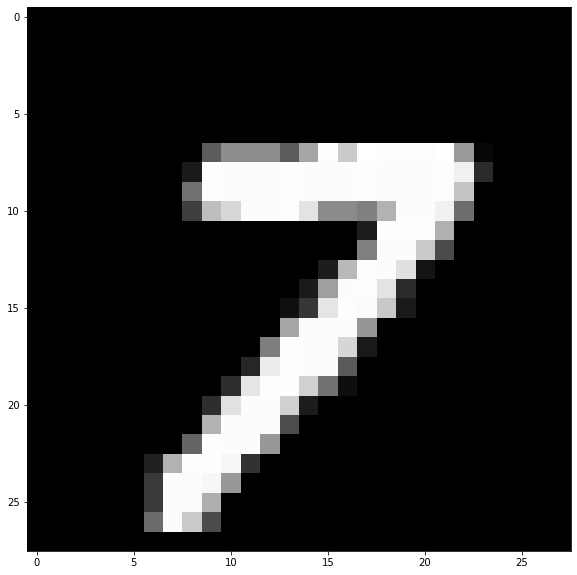

In [27]:
for i in range(10):
    a          = np.random.randint(0,m_test)
    array_test = np.reshape(x_test_np[:,a]*255.0, (28, 28))
    data_test  = im.fromarray(array_test)
    imshow(data_test)
    Z_layer1          = weights_layer1_Network1 @ x_test_np[:,a,None] + biases_layer1_Network1[:,0,None]
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network1 @ activation_layer1 + biases_layer2_Network1[:,0,None]
    activation_layer2 = Sigmoid(Z_layer2)
    print("The number is: ", np.argmax(activation_layer2,0))
    
    plt.show()

### Network 2

The number is:  [1]


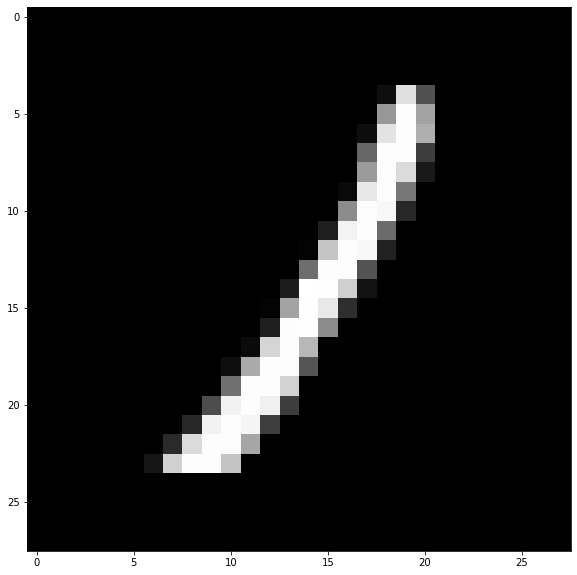

The number is:  [0]


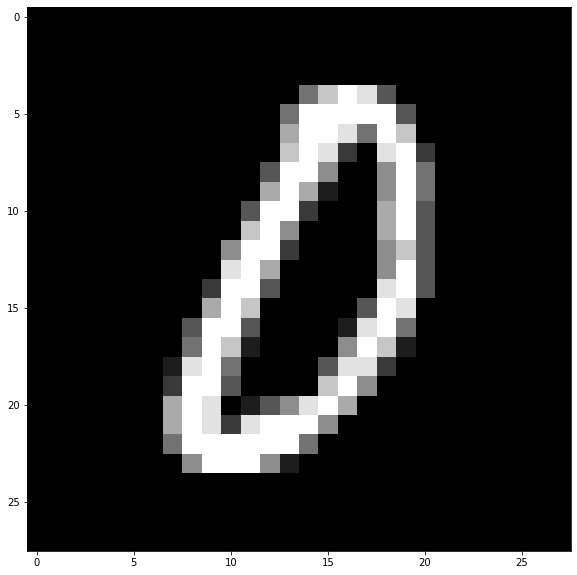

The number is:  [1]


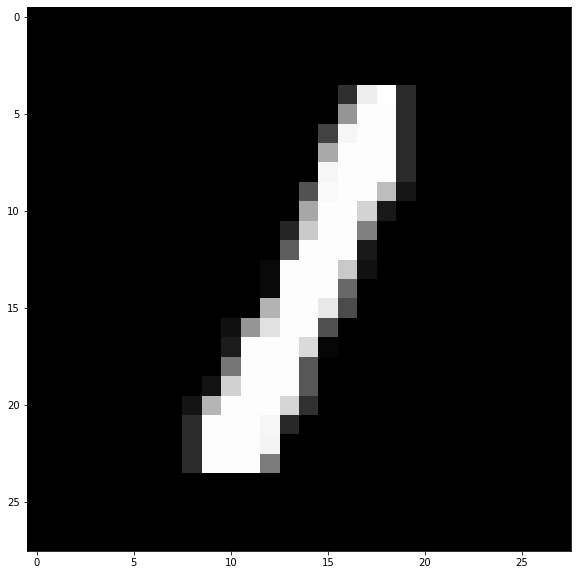

The number is:  [1]


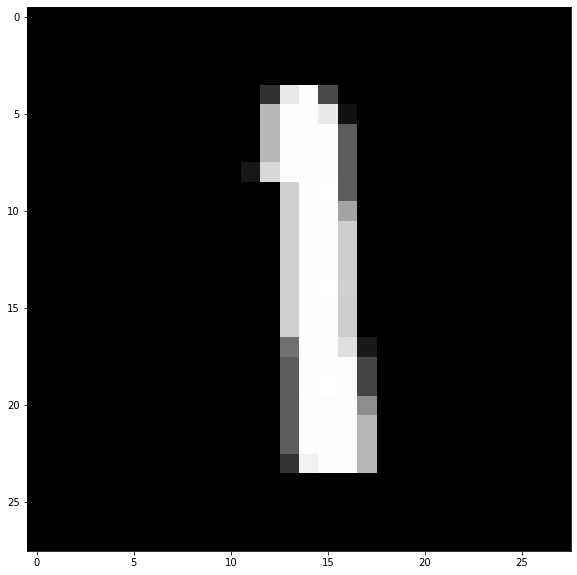

The number is:  [6]


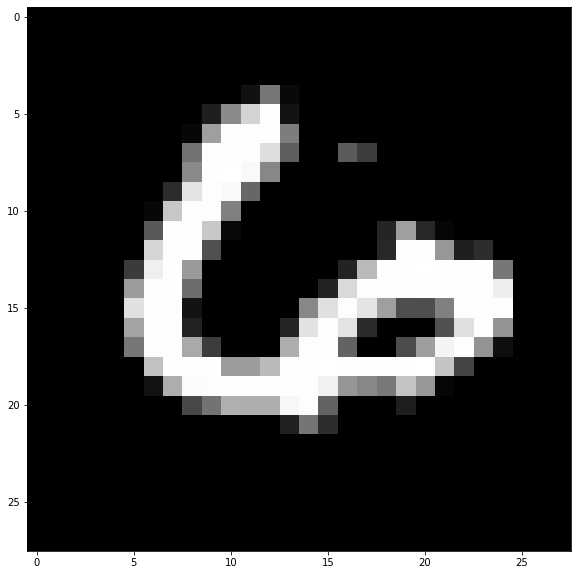

The number is:  [6]


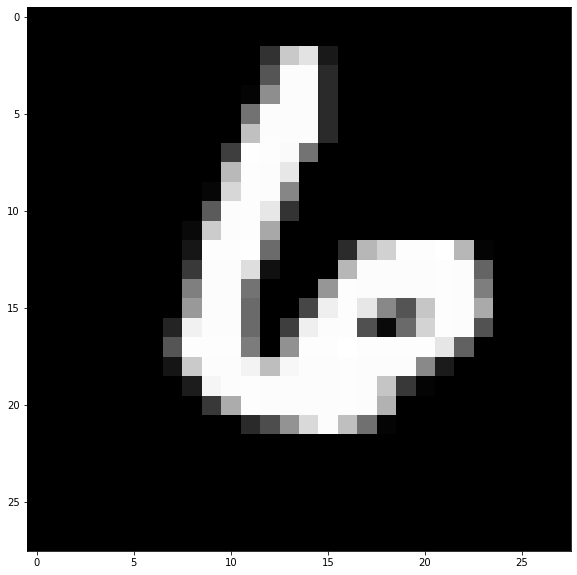

The number is:  [6]


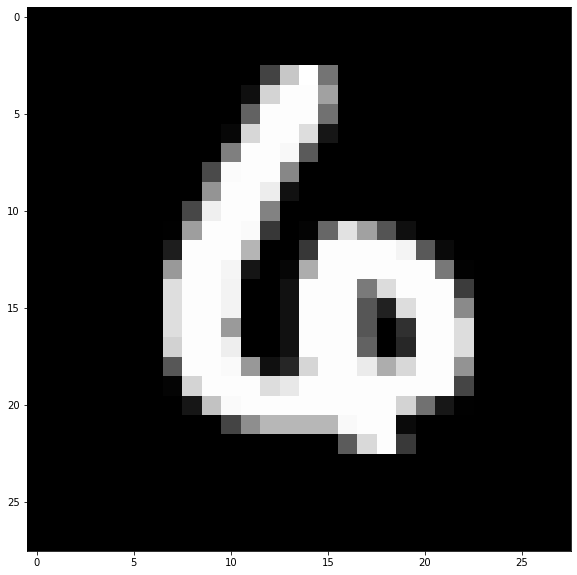

The number is:  [3]


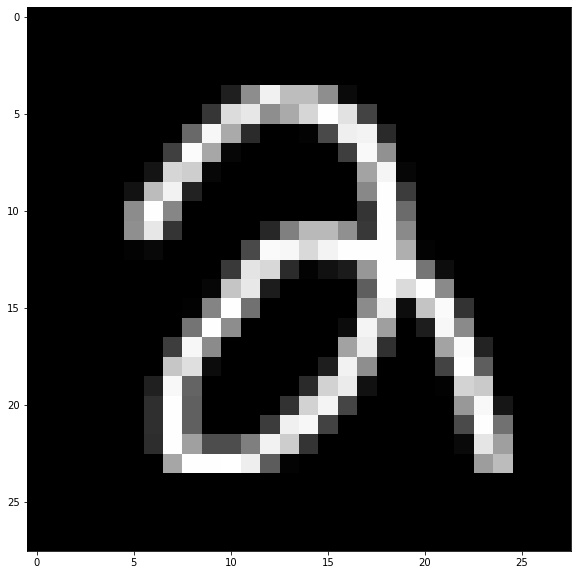

The number is:  [6]


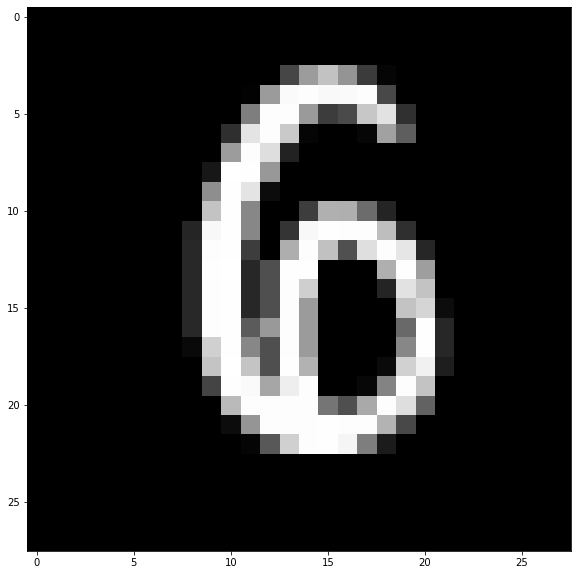

The number is:  [1]


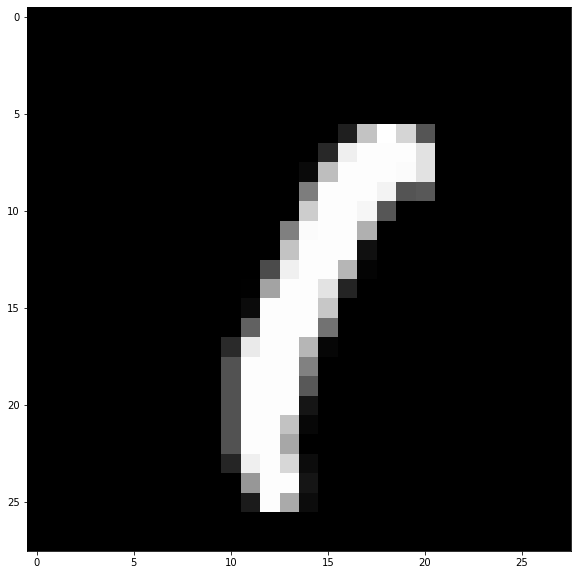

In [28]:
for i in range(10):
    a          = np.random.randint(0,m_test)
    array_test = np.reshape(x_test_np[:,a]*255.0, (28, 28))
    data_test  = im.fromarray(array_test)
    imshow(data_test)
    Z_layer1          = weights_layer1_Network2 @ x_test_np[:,a,None] + biases_layer1_Network2[:,0,None]
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network2 @ activation_layer1 + biases_layer2_Network2[:,0,None]
    activation_layer2 = Softmax(Z_layer2)
    print("The number is: ", np.argmax(activation_layer2,0))
    
    plt.show()

### Network 3

The number is:  [1]


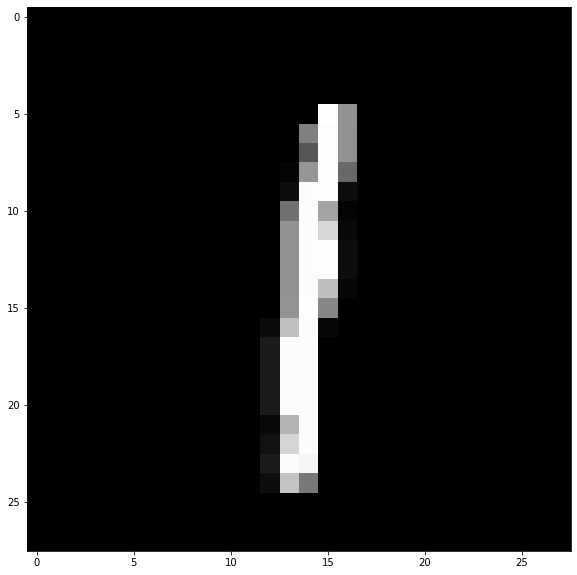

The number is:  [4]


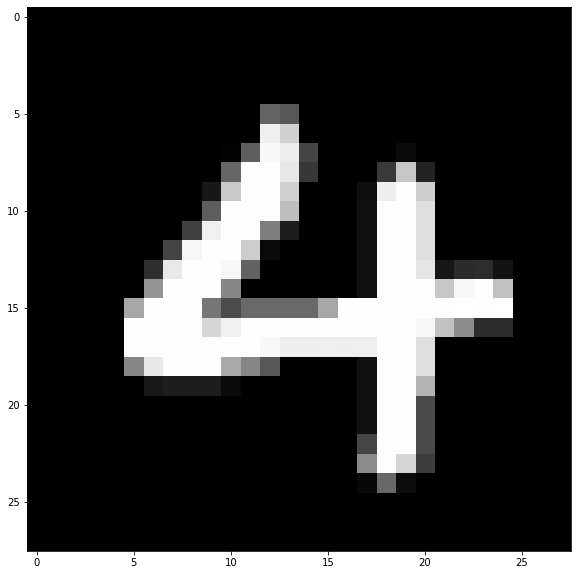

The number is:  [8]


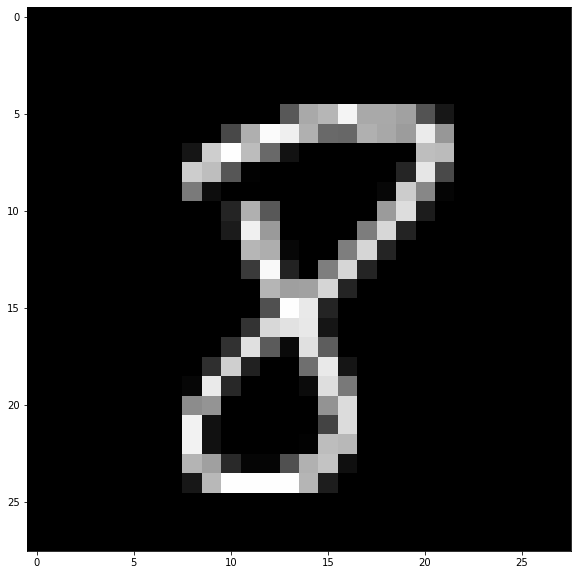

The number is:  [1]


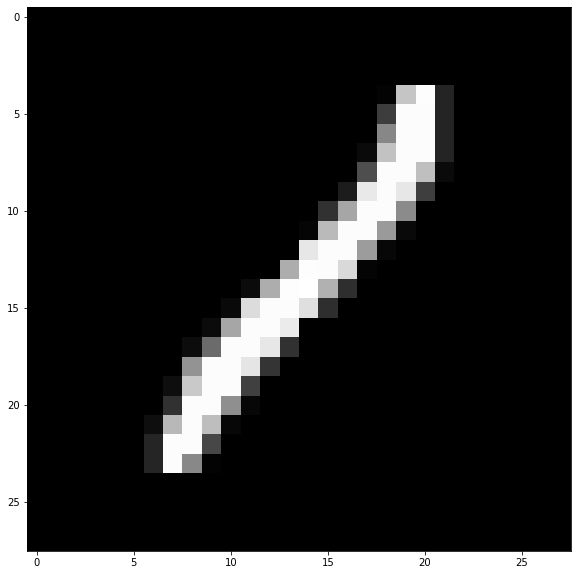

The number is:  [1]


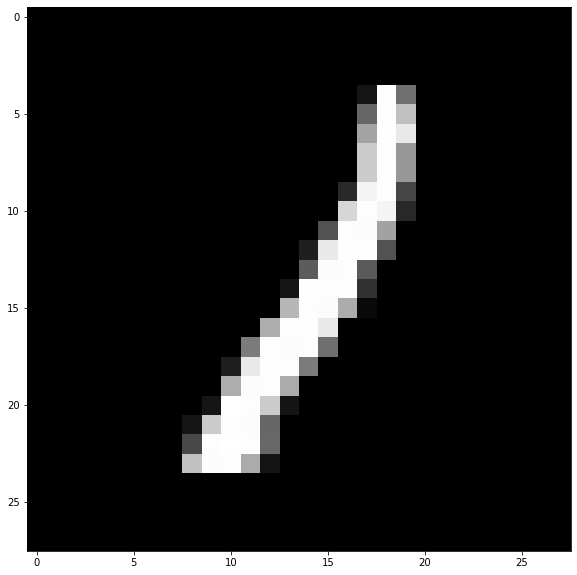

The number is:  [1]


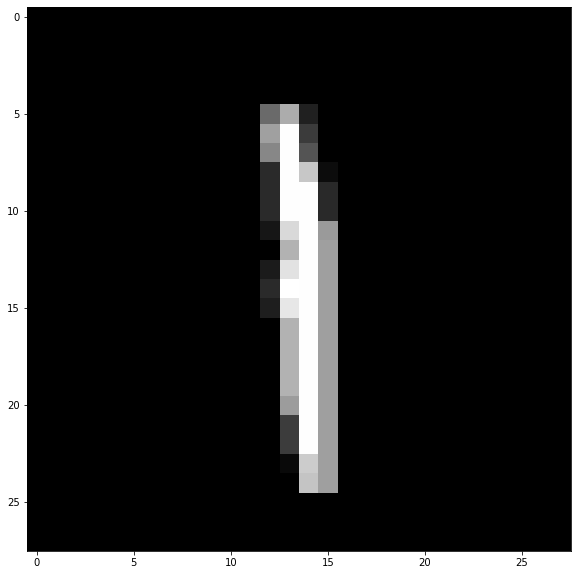

The number is:  [6]


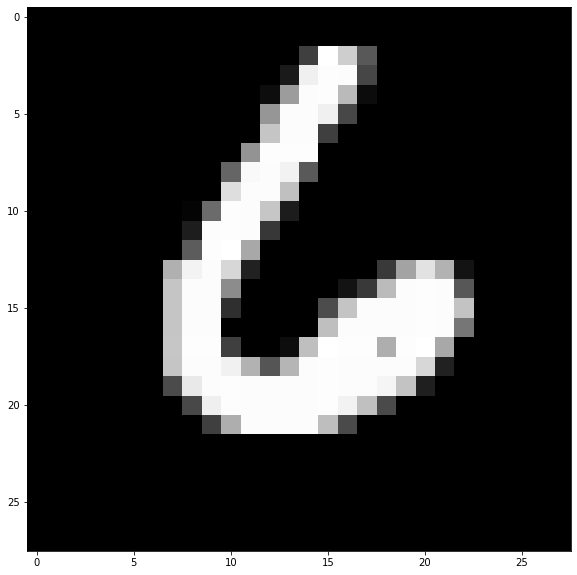

The number is:  [5]


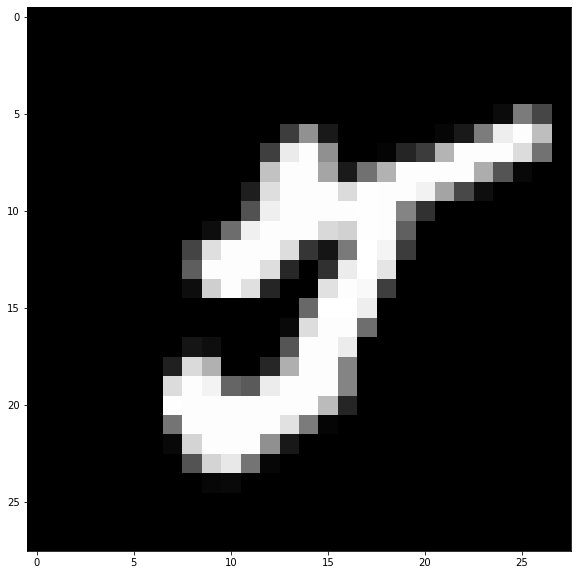

The number is:  [1]


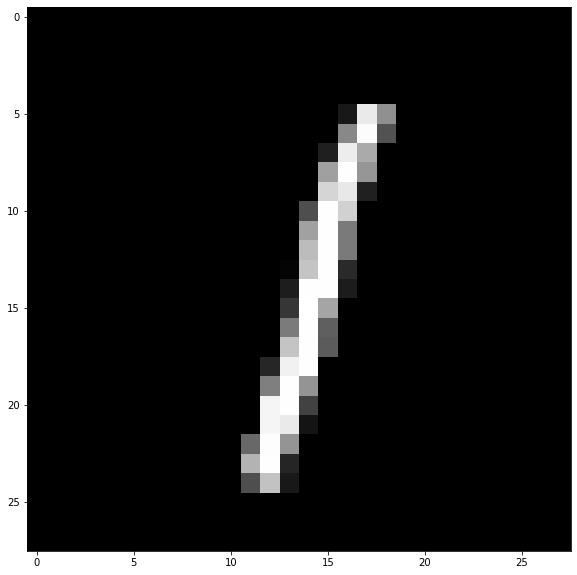

The number is:  [2]


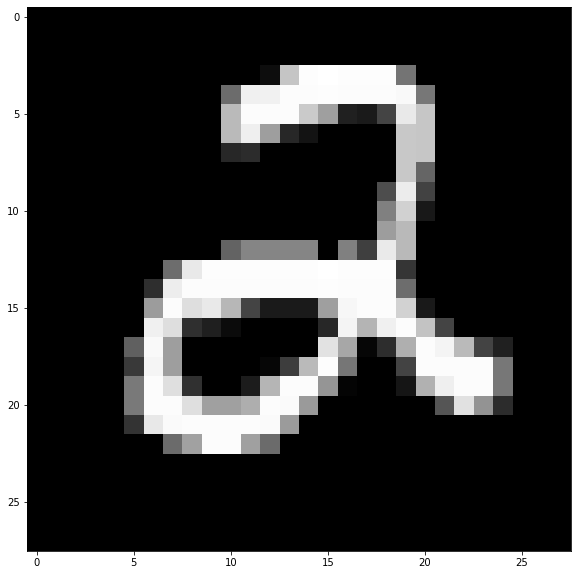

In [29]:
for i in range(10):
    a          = np.random.randint(0,m_test)
    array_test = np.reshape(x_test_np[:,a]*255.0, (28, 28))
    data_test  = im.fromarray(array_test)
    imshow(data_test)
    Z_layer1          = weights_layer1_Network3 @ x_test_np[:,a,None] + biases_layer1_Network3[:,0,None]
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network3 @ activation_layer1 + biases_layer2_Network3[:,0,None]
    activation_layer2 = Relu(Z_layer2)
    
    Z_layer3          = weights_layer3_Network3 @ activation_layer2 + biases_layer3_Network3[:,0,None]
    activation_layer3 = Softmax(Z_layer3)
    print("The number is: ", np.argmax(activation_layer3,0))

    plt.show()

# Prediction

In [45]:
ImageId = []
Label   = []
for i in range(m_test):
    Z_layer1          = weights_layer1_Network3 @ x_test_np[:,i,None] + biases_layer1_Network3[:,0,None]
    activation_layer1 = Relu(Z_layer1)
    
    Z_layer2          = weights_layer2_Network3 @ activation_layer1 + biases_layer2_Network3[:,0,None]
    activation_layer2 = Relu(Z_layer2)
    
    Z_layer3          = weights_layer3_Network3 @ activation_layer2 + biases_layer3_Network3[:,0,None]
    activation_layer3 = Softmax(Z_layer3)
    
    ImageId.append(i)
    Label.append(np.argmax(activation_layer3,0))

In [46]:
ImageId_array = np.asarray(ImageId)
Label_array   = np.asarray(Label).reshape(-1)
print(ImageId_array.shape,Label_array.shape)

(28000,) (28000,)


In [47]:
Prediction_dataframe = pd.DataFrame({'ImageId': ImageId_array, 'Label': Label_array})
Prediction_dataframe.to_csv('prediction_digits.csv')

## Appendix

### 2 Layers with Sigmoid 2

In [33]:
def Layers2_sigmoid2(n_xtrain,y_train,iterations,learning_rate):
    iterations    = iterations
    learning_rate = learning_rate
    n_neurons_layer1 = 20
    n_neurons_layer2 = 10 # 10 digits
    
    ## initialization ##
    # Random matrix and vector #
    # Layer 1 #
    weights_layer1 = np.random.rand(n_neurons_layer1,n_xtrain) - 0.5 #matrix drwan from uniform distrib - if randn then from Normal distribution
    biases_layer1  = np.random.rand(n_neurons_layer1,1) - 0.5  #vector
    # Layer 2 #
    weights_layer2 = np.random.rand(n_neurons_layer2,n_neurons_layer1)- 0.5  #matrix
    biases_layer2  = np.random.rand(n_neurons_layer2,1) - 0.5  #vector
    
    accuracy_history_Network1 = []
    sqrt_mse_history_Network1 = []
    r2_score_history_Network1 = []
    
    for j in range(iterations):
        ## Forward Propagation ##
        Z_layer1          = weights_layer1 @ x_train_np + biases_layer1
        activation_layer1 = Relu(Z_layer1)
        Z_layer2          = weights_layer2 @ activation_layer1 + biases_layer2
        activation_layer2 = Sigmoid(Z_layer2)
   
            
        ## backward propagation ##
        MSE      = activation_layer2 - y_train
        Layer_2b = MSE *  Sigmoid_deriv(Z_layer2)  
        Layer_1b = (weights_layer2.T @ Layer_2b) * Relu_derive(Z_layer1) 
        Layer_1w = Layer_1b @ x_train_np.T
        
        # Layer 2 #
        biases_layer2  = biases_layer2 - learning_rate*Layer_2b
        weights_layer2 = weights_layer2 - learning_rate*(Layer_2b @ activation_layer1.T)  
        # Layer 1 #
        weights_layer1 = weights_layer1 - learning_rate * Layer_1w
        biases_layer1  = biases_layer1 - learning_rate * Layer_1b
        

        ## accurary ##
        categoricalAccuracy = Categrorical_accuracy(activation_layer2,y_train)

        accuracy_history_Network1.append(categoricalAccuracy)
        sqrt_mse_history_Network1.append(np.sqrt(mean_squared_error(y_train,activation_layer2)))
        r2_score_history_Network1.append(r2_score(y_train,activation_layer2))


        if j%500 == 0:
            metric = tf.keras.metrics.CategoricalAccuracy()
            metric.update_state(y_train.T,activation_layer2.T)
            print("Epoch", j)
            print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,activation_layer2)))
            print("R2 Score: ",r2_score(y_train,activation_layer2))
            print("Cost: ", cost(y_train,activation_layer2))
            print("Categorical Accuracy: ", categoricalAccuracy, " (Keras: ", metric.result().numpy(), ")")
            print("\n")
        
    return accuracy_history_Network1, sqrt_mse_history_Network1, r2_score_history_Network1, weights_layer1, biases_layer1, weights_layer2, biases_layer2

In [34]:
accuracy_history_Network1bis, sqrt_mse_history_Network1bis, r2_score_history_Network1bis, weights_layer1_Network1bis, biases_layer1_Network1bis, weights_layer2_Network1bis, biases_layer2_Network1bis = Layers2_sigmoid2(n_xtrain,y_train,2001,1E-5)

Epoch 0
Root Mean Squared Error:  0.5171630674820723
R2 Score:  -1.9717517053209677
Cost:  0.26745763836746655
Categorical Accuracy:  0.07614285714285714  (Keras:  0.076142855 )


Epoch 500
Root Mean Squared Error:  0.2041932416560834
R2 Score:  0.5367235300689958
Cost:  0.0416948799380197
Categorical Accuracy:  0.6941428571428572  (Keras:  0.6941429 )


Epoch 1000
Root Mean Squared Error:  0.17552904558626176
R2 Score:  0.6576616934975387
Cost:  0.03081044584442395
Categorical Accuracy:  0.79  (Keras:  0.79 )


Epoch 1500
Root Mean Squared Error:  0.16339256287382978
R2 Score:  0.7033652098791929
Cost:  0.026697129602478418
Categorical Accuracy:  0.8112857142857143  (Keras:  0.81128573 )


Epoch 2000
Root Mean Squared Error:  0.14134011356794388
R2 Score:  0.7780330129765987
Cost:  0.01997702770339927
Categorical Accuracy:  0.8927619047619048  (Keras:  0.8927619 )




The number is:  8


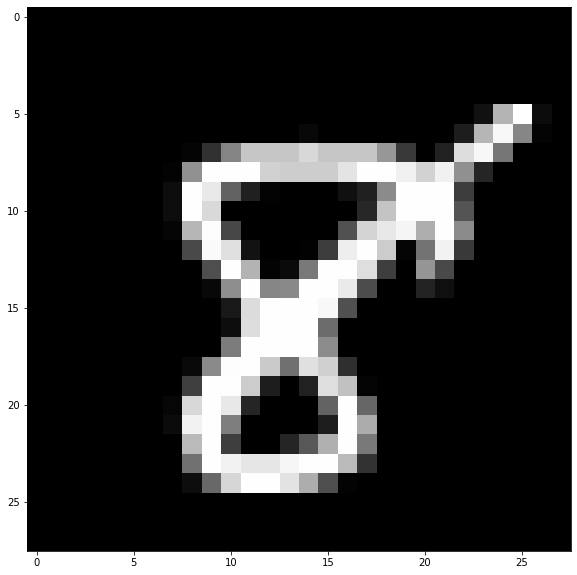

The number is:  0


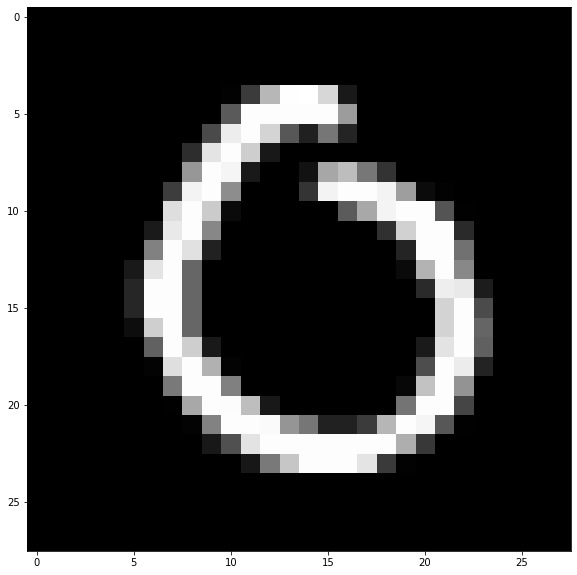

The number is:  5


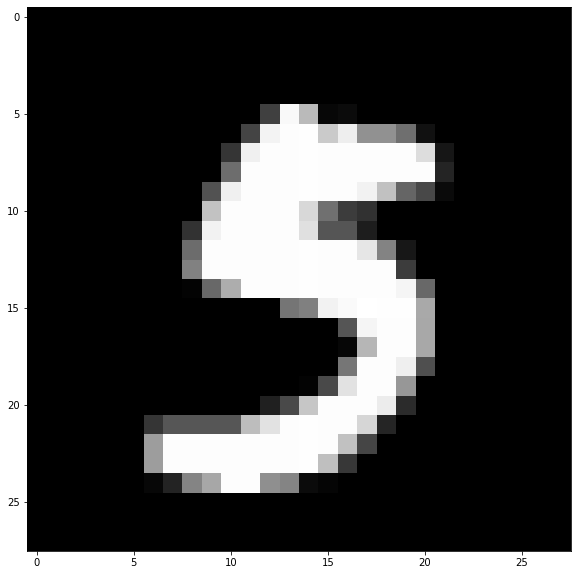

The number is:  2


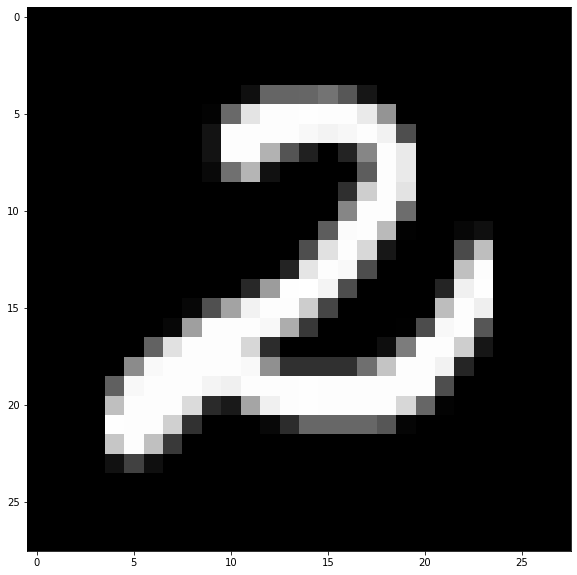

The number is:  4


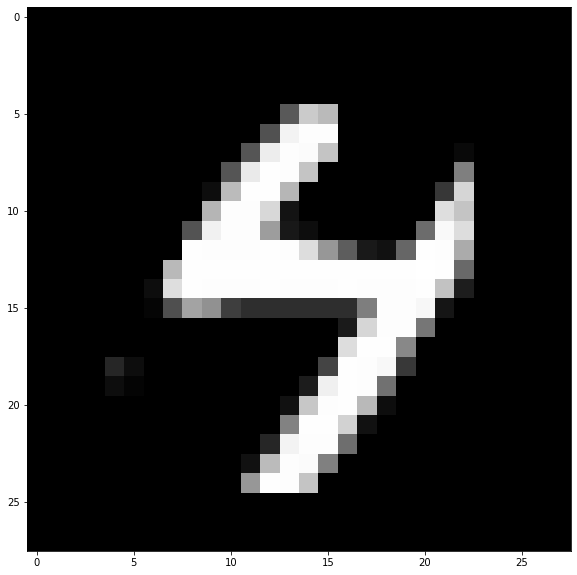

The number is:  7


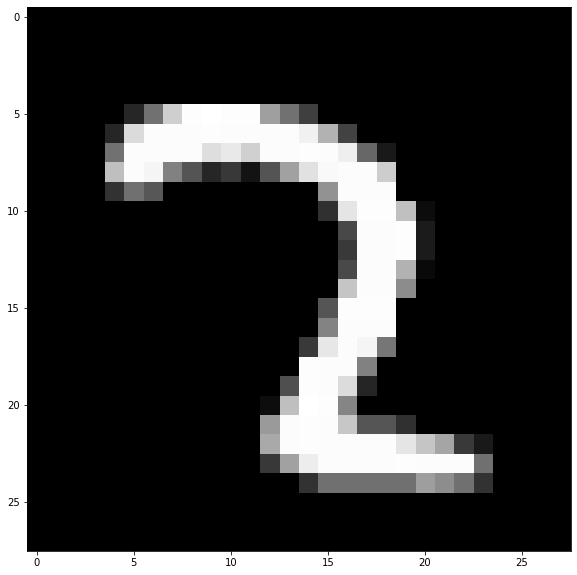

The number is:  2


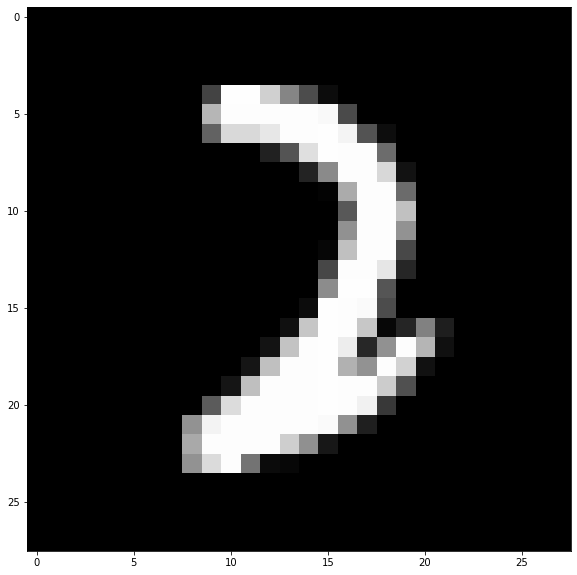

The number is:  2


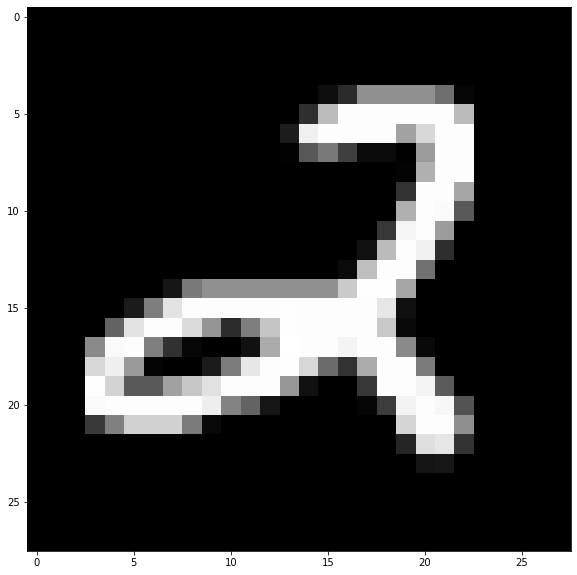

The number is:  3


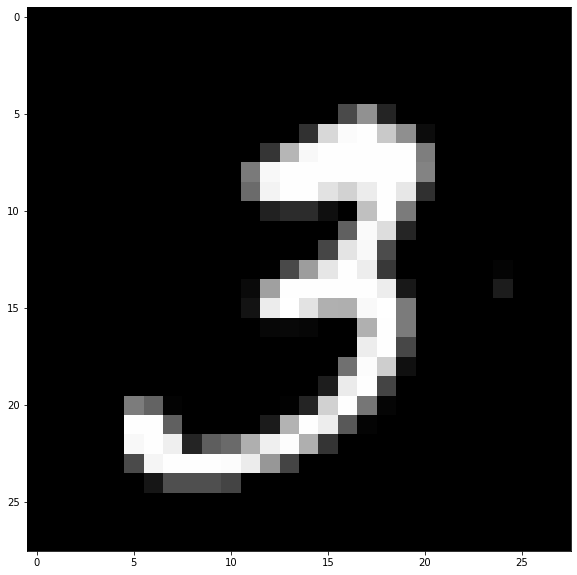

The number is:  6


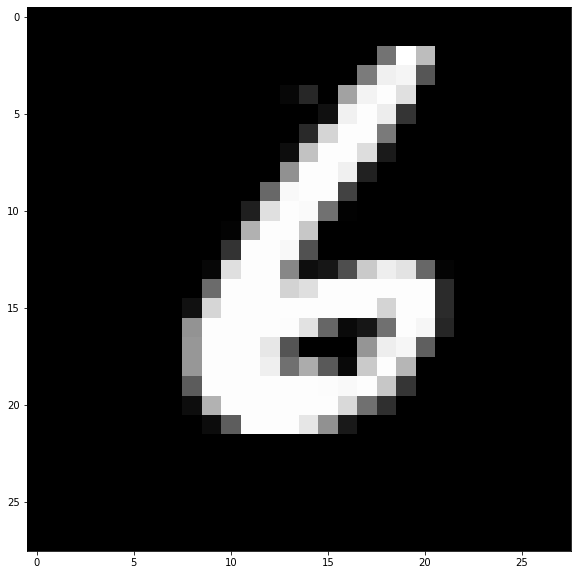

In [35]:
Layers2_sigmoid_Validation(x_train_np,m_ytrain,weights_layer1_Network1bis, biases_layer1_Network1bis, weights_layer2_Network1bis, biases_layer2_Network1bis)

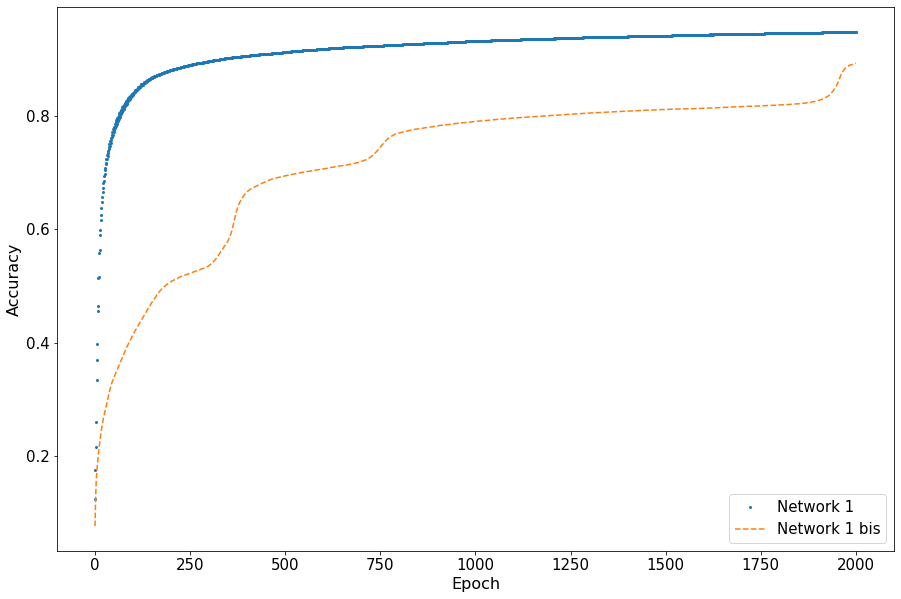

In [36]:
plt.plot(accuracy_history_Network1,'.',markersize=4, label="Network 1")
plt.plot(accuracy_history_Network1bis,'--', label="Network 1 bis")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

In [37]:
Cost_history_Network3bis, accuracy_history_Network3bis, sqrt_mse_history_Network3bis, r2_score_history_Network3bis, weights_layer1_Network3bis, biases_layer1_Network3bis, weights_layer2_Network3bis, biases_layer2_Network3bis, weights_layer3_Network3bis, biases_layer3_Network3bis = Layers3_softmax(n_xtrain,y_train,2001,1E-6) 

Epoch 0
Root Mean Squared Error:  0.3787952970180292
R2 Score:  -0.5942876127773707
Cost:  0.14348587704297697
Categorical Accuracy:  0.10073809523809524  (Keras:  0.10073809 )


Epoch 500
Root Mean Squared Error:  0.15788328299128526
R2 Score:  0.7230318615944985
Cost:  0.024927131048106274
Categorical Accuracy:  0.8287857142857142  (Keras:  0.8287857 )


Epoch 1000
Root Mean Squared Error:  0.1351276152521602
R2 Score:  0.7971169618288845
Cost:  0.018259472403735832
Categorical Accuracy:  0.8784285714285714  (Keras:  0.8784286 )


Epoch 1500
Root Mean Squared Error:  0.12447120754253016
R2 Score:  0.8278546401949064
Cost:  0.01549308150709561
Categorical Accuracy:  0.8981428571428571  (Keras:  0.8981429 )


Epoch 2000
Root Mean Squared Error:  0.11725912627412503
R2 Score:  0.8472255169840814
Cost:  0.013749702694571198
Categorical Accuracy:  0.9098095238095238  (Keras:  0.9098095 )




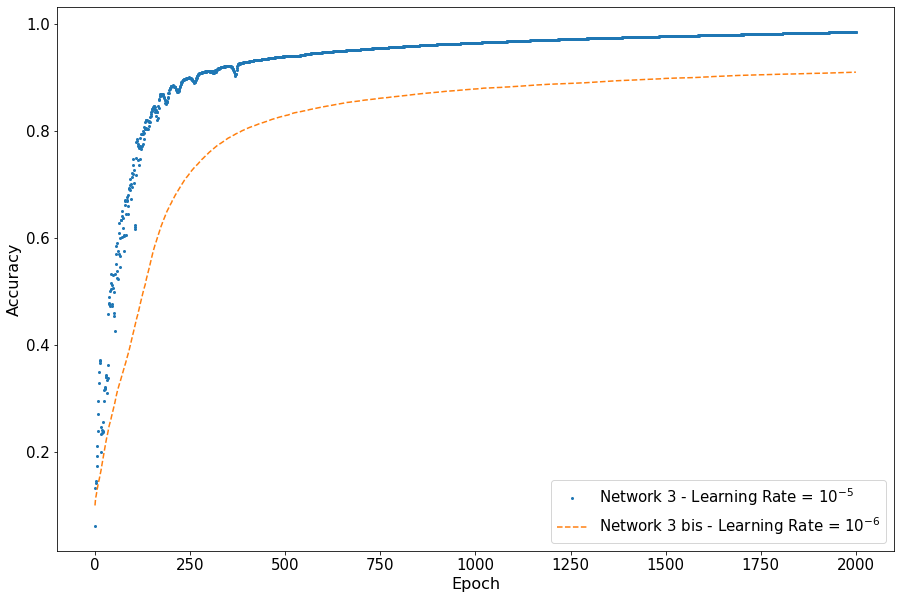

In [48]:
plt.plot(accuracy_history_Network3,'.',markersize=4, label="Network 3 - Learning Rate = $10^{-5}$")
plt.plot(accuracy_history_Network3bis,'--', label="Network 3 bis - Learning Rate = $10^{-6}$")
plt.xlabel("Epoch",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)